In [23]:
import matplotlib.pyplot as plt
import torch
import pytorch_measure as pm
import numpy as np
N = 17 # number of atoms
M = 2000 # Number of datapoints
amin = -5
amax = 3
verbose = True
dev = 'cpu'


torch.manual_seed(1)

def regression_model(x, list):
    return list[0] + x

x = torch.linspace(0, 10, M).view(-1, 1)
data = regression_model(torch.randn(M).to(dev) - 2, x.view(1, -1)).view(-1, 1)
w = torch.rand(N,dtype=torch.float).to(dev)
w = torch.nn.parameter.Parameter(w/w.sum())
l = torch.linspace(amin, amax, N, requires_grad=False).to(dev)

index = []
for i in range(M):
    ab = (regression_model(x[i], [l]) - data[i]).abs()
    index.append(torch.argmin(ab))

def NLLLoss(m:list[pm.Measure]):
    return -(m[0].weights[index]).log().sum()

sd = (l[index] - data)**2
def WardLoss(w):
    return sum(sd * w[index])

def K(d):
        return 1/np.sqrt(2*np.pi)*np.exp(-d**2/2)


Epoch: 0          Loss: 3018.476562500 LR: [0.1]
Epoch: 1          Lr was reduced to: [0.010000000000000002]
Epoch: 10         Loss: 2922.677001953 LR: [0.010000000000000002]
Epoch: 15         Lr was reduced to: [0.0010000000000000002]
Epoch: 20         Loss: 2902.961181641 LR: [0.0010000000000000002]
Epoch: 30         Loss: 2898.976562500 LR: [0.0010000000000000002]
Epoch: 40         Loss: 2896.242675781 LR: [0.0010000000000000002]
Epoch: 50         Loss: 2894.750244141 LR: [0.0010000000000000002]
Epoch: 55         Lr was reduced to: [0.00010000000000000003]
Epoch: 60         Loss: 2894.376220703 LR: [0.00010000000000000003]
Epoch: 70         Loss: 2894.320312500 LR: [0.00010000000000000003]
Epoch: 80         Loss: 2894.269287109 LR: [0.00010000000000000003]
Epoch: 90         Loss: 2894.222900391 LR: [0.00010000000000000003]
Epoch: 100        Loss: 2894.178222656 LR: [0.00010000000000000003]
Epoch: 110        Loss: 2894.135498047 LR: [0.00010000000000000003]
Epoch: 120        Loss: 28

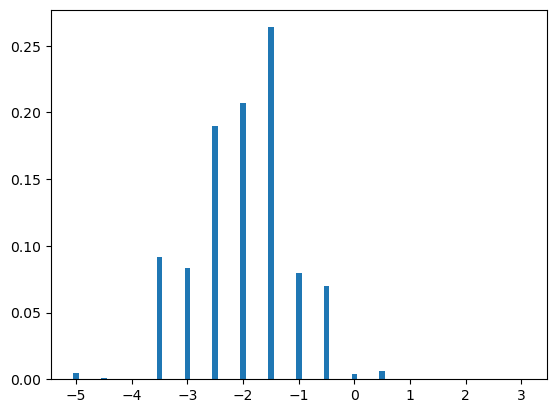

In [27]:
measure = pm.Measure(locations=l, weights=w, device=dev)

opt_KDE = pm.Optimizer([measure], loss='KDEnll', lr=1e-1)
new_mesKDE = opt_KDE.minimize(verbose=True, model=regression_model, data=[x, data], print_freq=10, max_epochs=1000, tol_const=1e-3, adaptive=True)
'''
opt_NLL = pm.Optimizer([measure], loss='nll', lr=1e-1)
new_mes = opt_NLL.minimize(verbose=True, model=regression_model, data=[x, data], print_freq=10, max_epochs=1000, tol_const=1e-3, adaptive=True)
'''


#plt.bar(l + 0.1, new_mes[0].weights.tolist(), width = 0.2, label='NLL')
new_mesKDE[0].visualize()
plt.show()


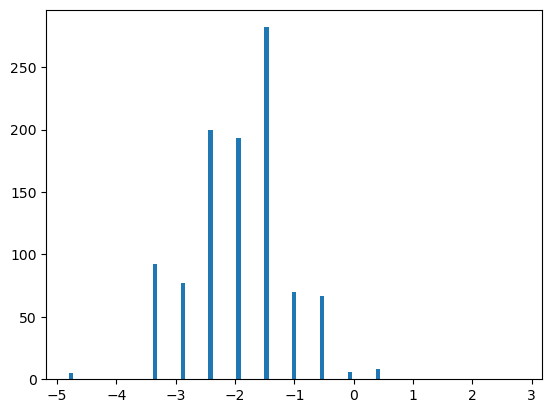

In [40]:
samp = new_mesKDE[0].sample(1000)
plt.hist(samp, rwidth=0.15, range=[-5, 3], bins=17)
plt.show()

In [42]:
checker = pm.Check(opt_KDE, regression_model, x, data)
checker.check()

299 is outside the confidence interval (81.0, 120.0):
Number of misses is significantly at 95.0% confidence level different from expected for the fitted model!
